In [63]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [64]:
# plt.style.use('fivethirtyeight')

In [65]:
filename = "../data/data.csv"

In [66]:
df = pd.read_csv(filename)

In [67]:
df.head(5)

,datetime,consumption
0,"12/19/2018, 3:00:02 PM",249.0
1,"12/19/2018, 4:00:03 PM",294.0
2,"12/19/2018, 6:00:02 PM",287.0
3,"12/19/2018, 7:00:02 PM",285.0
4,"12/19/2018, 8:00:02 PM",228.0


### Convert index to datetime

In [68]:
df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])
df.head(5)

,consumption
datetime,
2018-12-19 15:00:02,249.0
2018-12-19 16:00:03,294.0
2018-12-19 18:00:02,287.0
2018-12-19 19:00:02,285.0
2018-12-19 20:00:02,228.0


### Verify that no value is null

In [69]:
df.isna().sum()

consumption    0
dtype: int64

In [70]:
min(df.consumption)

0.0

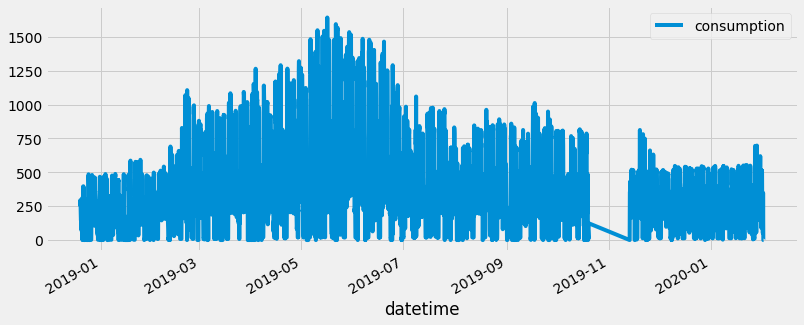

In [71]:
df.plot(figsize=(12,5),legend=True)
plt.show()

## Maximum Energy Consumption Values

In [72]:
df.nlargest(10,'consumption')

,consumption
datetime,
2019-05-16 12:00:02,1642.0
2019-05-16 11:00:01,1619.0
2019-05-21 15:00:02,1593.0
2019-05-21 16:00:02,1582.0
2019-05-22 14:00:02,1567.0
2019-05-22 15:00:02,1567.0
2019-05-22 12:00:01,1553.0
2019-05-22 13:00:02,1550.0
2019-05-10 15:00:02,1548.0


In [73]:
df = df.reset_index()

In [74]:
df = df.rename(columns={'datetime':'ds','consumption':'y'}).head()

In [87]:
model = Prophet(weekly_seasonality=True,daily_seasonality=True,yearly_seasonality=True)

In [88]:
model.fit(df,algorithm='Newton')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


In [89]:
p=model.predict(df)

In [90]:
p.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-19 15:00:02,277.106491,242.880246,310.289174,277.106491,277.106491,0.0,0.0,0.0,0.0,0.0,0.0,277.106491
1,2018-12-19 16:00:03,273.828037,241.870378,305.357895,273.828037,273.828037,0.0,0.0,0.0,0.0,0.0,0.0,273.828037
2,2018-12-19 18:00:02,267.273861,237.085997,301.552022,267.273861,267.273861,0.0,0.0,0.0,0.0,0.0,0.0,267.273861
3,2018-12-19 19:00:02,263.996318,231.752035,292.712885,263.996318,263.996318,0.0,0.0,0.0,0.0,0.0,0.0,263.996318
4,2018-12-19 20:00:02,260.718775,228.337418,289.175292,260.718775,260.718775,0.0,0.0,0.0,0.0,0.0,0.0,260.718775


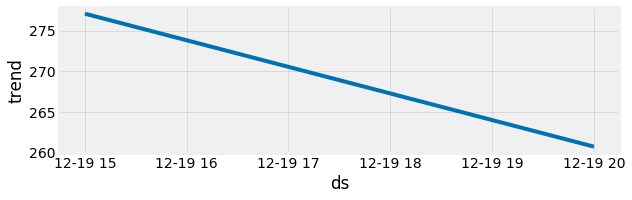

In [91]:
fig = model.plot_components(p)